In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
import tensorflow as tf
import string
from document_utils import *
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_validate
from sklearn import datasets, linear_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [3]:
x_train = load_x_train()
x_test = load_x_test()
y_train = load_y_train()
y_test = load_y_test()

verify_all_datasets()


x_train shape: (20000, 784)

y_train shape: (20000, 1)

x_test shape: (2000, 784)

y_test shape: (2000, 1)


In [ ]:
# A-Z dataset graph
csv_file= pd.read_csv('main_dataset/A_Z Handwritten Data.csv').astype('float32')
        
dataset = pd.DataFrame(csv_file)

x = dataset.drop('0', axis = 1)
y = dataset['0']

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

y_integer = np.intp(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.barh(alphabets, count)

plt.xlabel('Number Of Each Alphabets', fontsize = 8)
plt.ylabel('Alphabets', fontsize = 8)
plt.show()

In [20]:
# model testing

model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        
        Dense(126, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.2)),
        Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.2)),
        Dense(26, activation='softmax')
        
    ], name = "new_model" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy'],
)

history = model.fit(x_train, y_train, validation_split = 0.1, epochs=100)



Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 5.0856 - accuracy: 0.4179 - val_loss: 1.9333 - val_accuracy: 0.5060
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 1.6728 - accuracy: 0.5687 - val_loss: 1.5257 - val_accuracy: 0.5980
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 1.3370 - accuracy: 0.6297 - val_loss: 1.2962 - val_accuracy: 0.6560
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 1.1308 - accuracy: 0.6792 - val_loss: 1.2900 - val_accuracy: 0.6945
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.9596 - accuracy: 0.7218 - val_loss: 0.9860 - val_accuracy: 0.7395
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.8017 - accuracy: 0.7654 - val_loss: 0.8983 - val_accuracy: 0.7795
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.6720 - accuracy: 0.8011 - val_loss: 0.7560 - val_accuracy: 0.8145

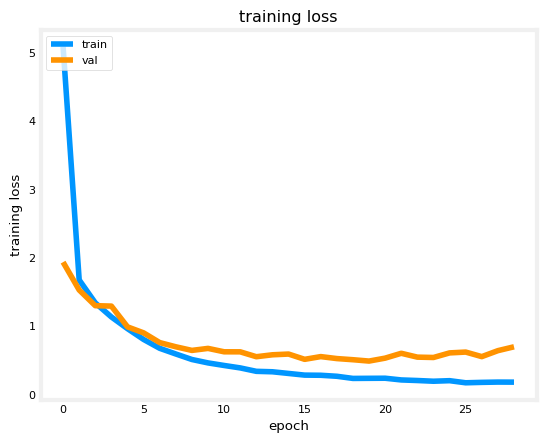

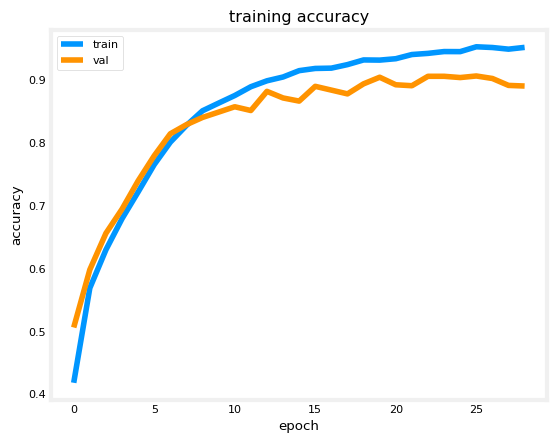

In [21]:
# print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
decisionTree = tree.DecisionTreeClassifier()
scores_test = cross_val_score(decisionTree, x_test, y_test, cv=8)
print(scores_test)
print(scores_test.mean())


scores_train = cross_val_score(decisionTree, x_train, y_train, cv=8)
print(scores_train)

print(scores_train.mean())

err_cv = abs(scores_test.mean())

[0.57 0.52 0.58 0.58 0.6  0.63 0.57 0.57]
0.5754999999999999
[0.74 0.74 0.74 0.75 0.76 0.74 0.72 0.73]
0.7396499999999999


Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 22.5141 - accuracy: 0.3994 - val_loss: 8.5657 - val_accuracy: 0.4995
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 5.3108 - accuracy: 0.4751 - val_loss: 3.2678 - val_accuracy: 0.4240
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 2.6329 - accuracy: 0.4257 - val_loss: 2.5002 - val_accuracy: 0.4220
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 2.1274 - accuracy: 0.4877 - val_loss: 2.1413 - val_accuracy: 0.5045
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 1.8404 - accuracy: 0.5513 - val_loss: 1.9256 - val_accuracy: 0.5710
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 1.6163 - accuracy: 0.6006 - val_loss: 1.7650 - val_accuracy: 0.5985
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 1.4404 - accuracy: 0.6364 - val_loss: 1.6556 - val_accuracy: 0.625

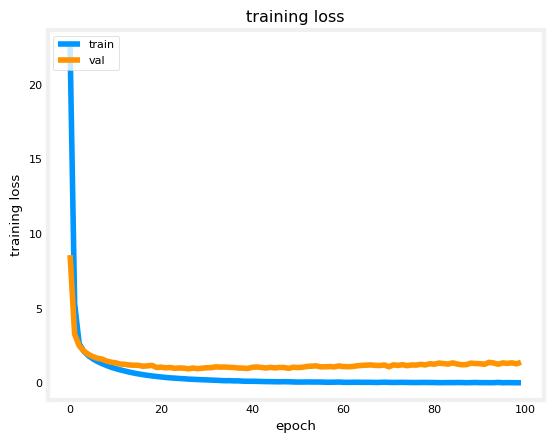

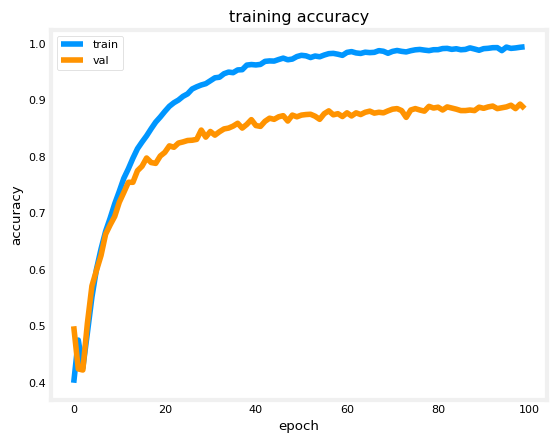

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 23.4457 - accuracy: 0.3077 - val_loss: 6.6074 - val_accuracy: 0.3520
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 4.1011 - accuracy: 0.3233 - val_loss: 3.1304 - val_accuracy: 0.3480
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 2.8048 - accuracy: 0.3871 - val_loss: 2.6757 - val_accuracy: 0.4160
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 2.4085 - accuracy: 0.4569 - val_loss: 2.3480 - val_accuracy: 0.4800
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 2.1220 - accuracy: 0.5124 - val_loss: 2.1169 - val_accuracy: 0.5355
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 1.8864 - accuracy: 0.5617 - val_loss: 1.9324 - val_accuracy: 0.5650
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 1.6943 - accuracy: 0.5968 - val_loss: 1.7553 - val_accuracy: 0.608

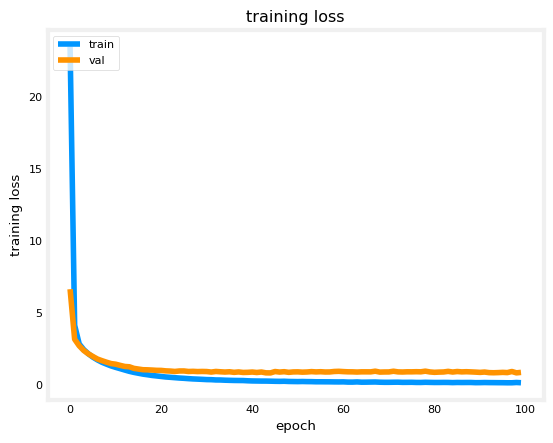

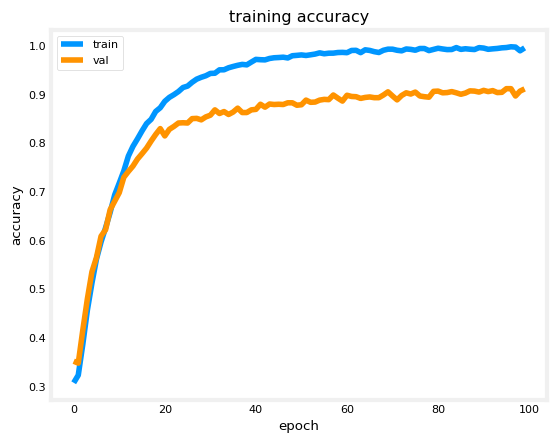

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 16.5724 - accuracy: 0.2288 - val_loss: 5.4901 - val_accuracy: 0.2015
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 4.9104 - accuracy: 0.2879 - val_loss: 4.5436 - val_accuracy: 0.3475
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 4.2512 - accuracy: 0.4225 - val_loss: 4.1227 - val_accuracy: 0.4605
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 3.8990 - accuracy: 0.5011 - val_loss: 3.8741 - val_accuracy: 0.5085
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 3.6524 - accuracy: 0.5413 - val_loss: 3.6816 - val_accuracy: 0.5450
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 3.4451 - accuracy: 0.5695 - val_loss: 3.5106 - val_accuracy: 0.5660
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 3.2591 - accuracy: 0.5892 - val_loss: 3.3761 - val_accuracy: 0.583

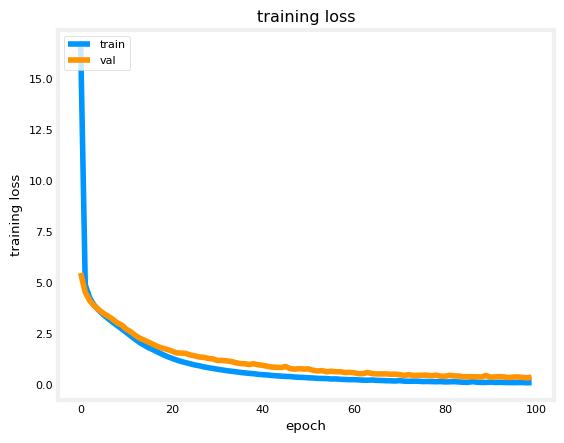

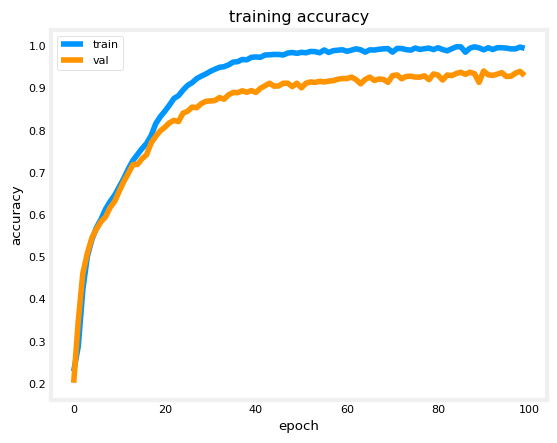

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 25.4274 - accuracy: 0.1864 - val_loss: 13.3851 - val_accuracy: 0.2275
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 12.5632 - accuracy: 0.2733 - val_loss: 12.0220 - val_accuracy: 0.2875
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 11.5555 - accuracy: 0.3231 - val_loss: 11.2012 - val_accuracy: 0.3405
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 10.7277 - accuracy: 0.3524 - val_loss: 10.3552 - val_accuracy: 0.3720
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 9.8521 - accuracy: 0.3795 - val_loss: 9.4457 - val_accuracy: 0.3970
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 8.8659 - accuracy: 0.4008 - val_loss: 8.3822 - val_accuracy: 0.4150
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 7.6486 - accuracy: 0.4796 - val_loss: 7.1759 - val_accuracy

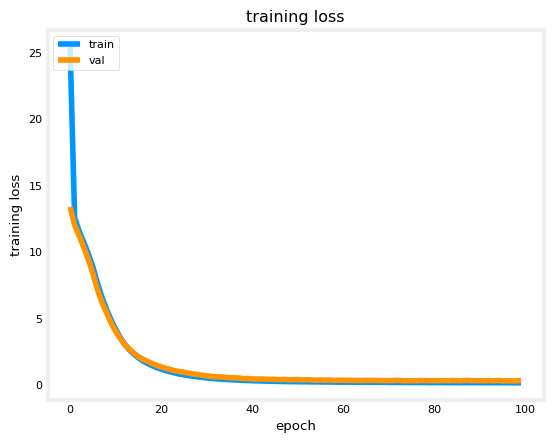

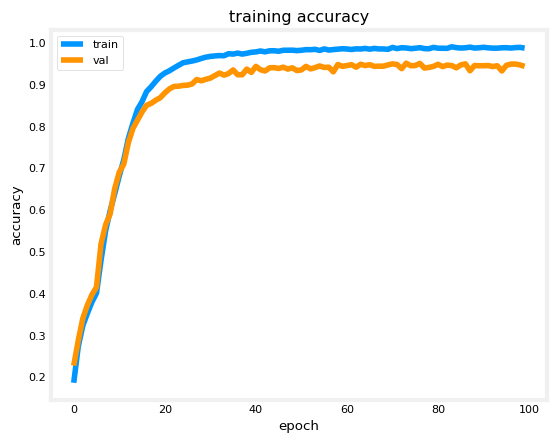

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 47.0057 - accuracy: 0.3806 - val_loss: 29.0342 - val_accuracy: 0.5100
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 25.0416 - accuracy: 0.5493 - val_loss: 22.4349 - val_accuracy: 0.5495
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 20.4082 - accuracy: 0.5671 - val_loss: 19.0945 - val_accuracy: 0.5335
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 17.8346 - accuracy: 0.5703 - val_loss: 17.0496 - val_accuracy: 0.5730
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 15.9081 - accuracy: 0.6169 - val_loss: 15.2357 - val_accuracy: 0.6155
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 14.0831 - accuracy: 0.6611 - val_loss: 13.4592 - val_accuracy: 0.6670
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 12.2952 - accuracy: 0.7019 - val_loss: 11.7602 - val_ac

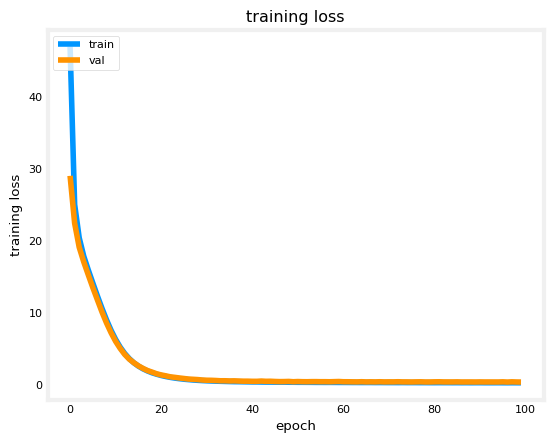

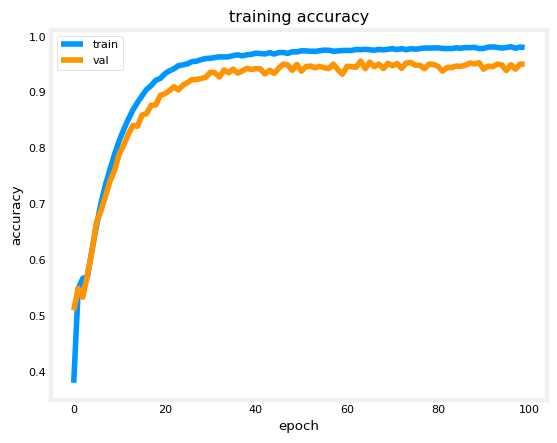

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 63.5905 - accuracy: 0.2964 - val_loss: 41.9013 - val_accuracy: 0.2710
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 37.6728 - accuracy: 0.3276 - val_loss: 34.4724 - val_accuracy: 0.3740
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 31.7328 - accuracy: 0.4213 - val_loss: 29.1502 - val_accuracy: 0.4385
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 26.4163 - accuracy: 0.4946 - val_loss: 23.9411 - val_accuracy: 0.5020
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 21.3029 - accuracy: 0.5587 - val_loss: 19.0245 - val_accuracy: 0.5635
Epoch 6/100
563/563 [==============================] - 1s 3ms/step - loss: 16.6345 - accuracy: 0.6058 - val_loss: 14.6733 - val_accuracy: 0.5995
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 12.6180 - accuracy: 0.6527 - val_loss: 10.9770 - val_ac

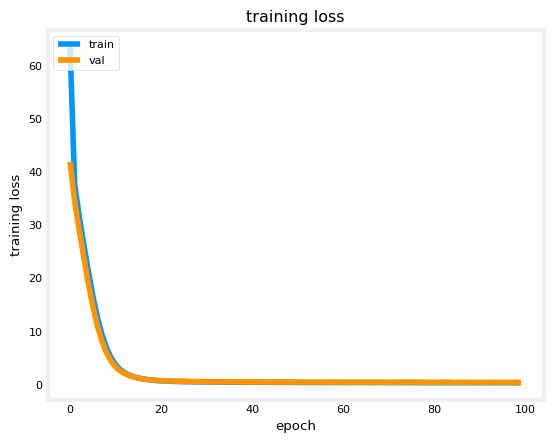

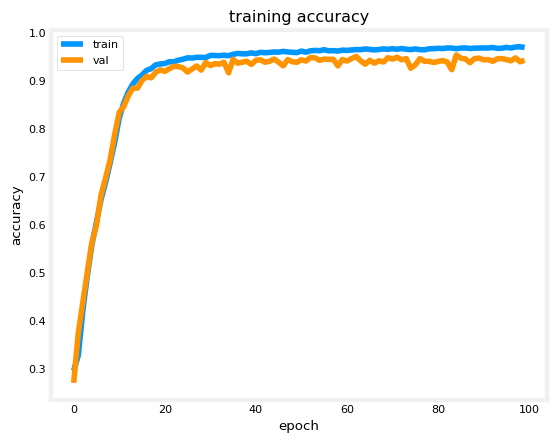

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 88.4107 - accuracy: 0.3345 - val_loss: 60.7360 - val_accuracy: 0.3775
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 52.1656 - accuracy: 0.3978 - val_loss: 46.1998 - val_accuracy: 0.4260
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 41.4180 - accuracy: 0.4877 - val_loss: 36.8774 - val_accuracy: 0.5150
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 32.5259 - accuracy: 0.5498 - val_loss: 28.4571 - val_accuracy: 0.5665
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 24.6381 - accuracy: 0.6022 - val_loss: 21.2071 - val_accuracy: 0.6135
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 18.0209 - accuracy: 0.6536 - val_loss: 15.3002 - val_accuracy: 0.6515
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 12.8153 - accuracy: 0.6964 - val_loss: 10.7578 - val_ac

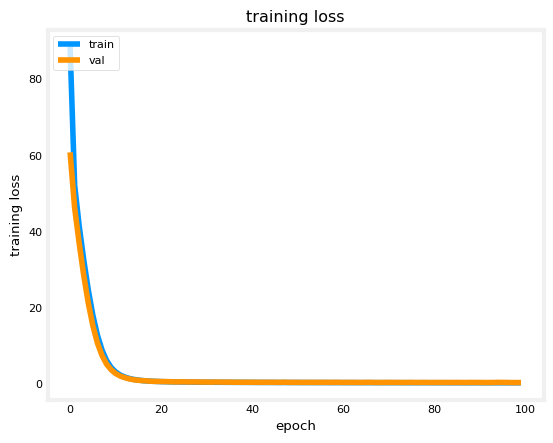

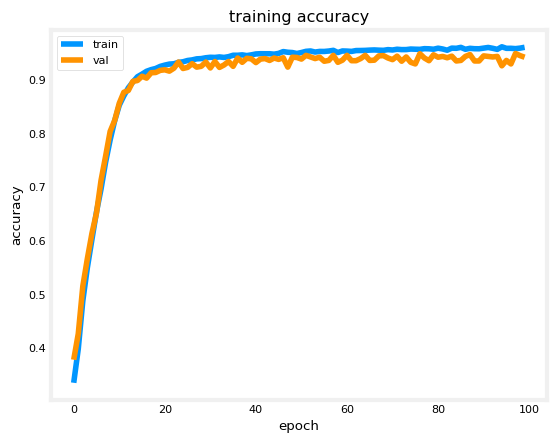

In [23]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    model = Sequential(
        [               
            tf.keras.Input(shape=(784,)),
            
            Dense(126, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(26, activation='softmax')
            
        ], name = "my_stupid_model" 
    )

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        metrics=['accuracy'],
    )

    history = model.fit(x_train, y_train, validation_split = 0.1, epochs=100)
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('training loss')
    plt.ylabel('training loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('training accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()